## Threshold

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

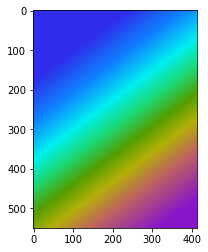

In [5]:
rainbow = cv2.imread(r'C:\Users\Data\computer vision\rainbow.jpg')

plt.imshow(rainbow, cmap='gray')

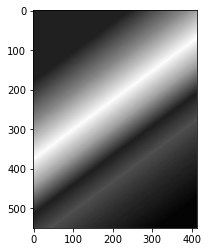

In [7]:
rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2GRAY)
plt.imshow(rainbow ,cmap='gray')

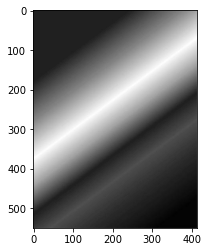

In [9]:
# to read in grayscale just directly add 0
img = cv2.imread(r'C:\Users\Data\computer vision\rainbow.jpg', 0)
plt.imshow(img ,cmap = 'gray')

### Simple Thresholding Functions

there are basic simple thresholding fuctions : 
 - cv2.THRESH_BINARY
 - cv2.THRESH_BINARY_INV
 - cv2.THRESH_TRUNC
 - cv2.THRESH_TOZERO
 - cv2.THRESH_TOZERO_INV

In [10]:
help(cv2.threshold)

Help on built-in function threshold:

threshold(...)
    threshold(src, thresh, maxval, type[, dst]) -> retval, dst
    .   @brief Applies a fixed-level threshold to each array element.
    .   
    .   The function applies fixed-level thresholding to a multiple-channel array. The function is typically
    .   used to get a bi-level (binary) image out of a grayscale image ( #compare could be also used for
    .   this purpose) or for removing a noise, that is, filtering out pixels with too small or too large
    .   values. There are several types of thresholding supported by the function. They are determined by
    .   type parameter.
    .   
    .   Also, the special values #THRESH_OTSU or #THRESH_TRIANGLE may be combined with one of the
    .   above values. In these cases, the function determines the optimal threshold value using the Otsu's
    .   or Triangle algorithm and uses it instead of the specified thresh.
    .   
    .   @note Currently, the Otsu's and Triangle methods a

## cv2.THRESH_BINARY

In [15]:
ret1, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# threshol =127 as near to half 255 pixel 
# can check from img.max()
# any value below  127 will be 0 and above 127 will be 255

In [16]:
ret1

127.0

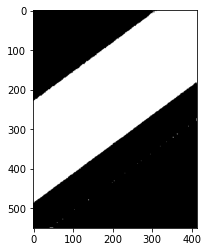

In [19]:
plt.imshow(thresh1, cmap='gray')

### cv2.THRESH_TRUNC

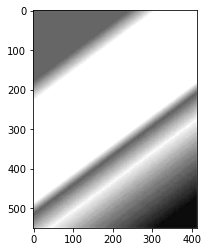

In [23]:
img = cv2.imread(r'C:\Users\Data\computer vision\rainbow.jpg', 0)
ret1, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
plt.imshow(thresh ,cmap='gray')

### cv2.THRESH_TOZERO

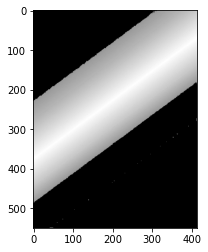

In [26]:
img = cv2.imread(r'C:\Users\Data\computer vision\rainbow.jpg', 0)
ret1, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
plt.imshow(thresh, cmap='gray')

## On Real World Application

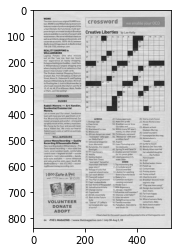

In [27]:
img_r = cv2.imread(r'C:\Users\Data\computer vision\crossword.jpg',0)
plt.imshow(img_r, cmap='gray')

In [64]:
def show_pic(img):
    fix = plt.figure(figsize=(15, 15))
    ax = fix.add_subplot(111)
    ax.imshow(img,cmap='gray')

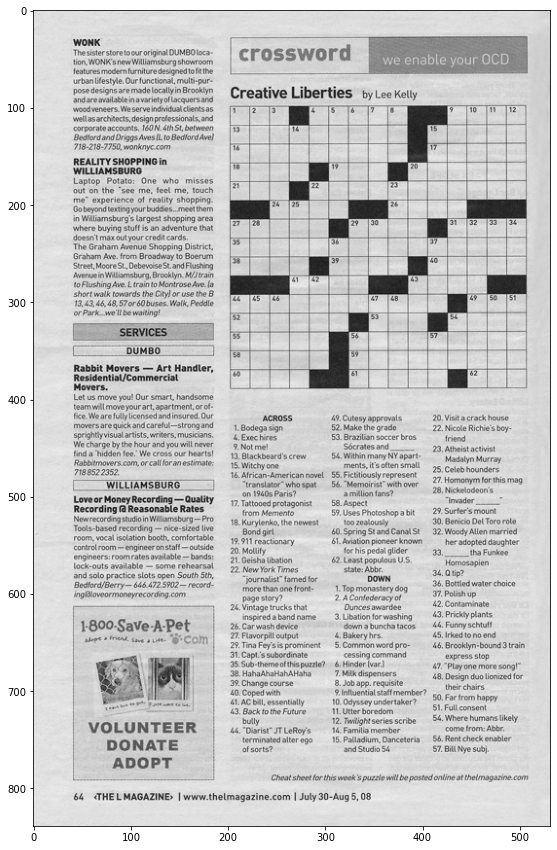

In [65]:
show_pic(img_r)

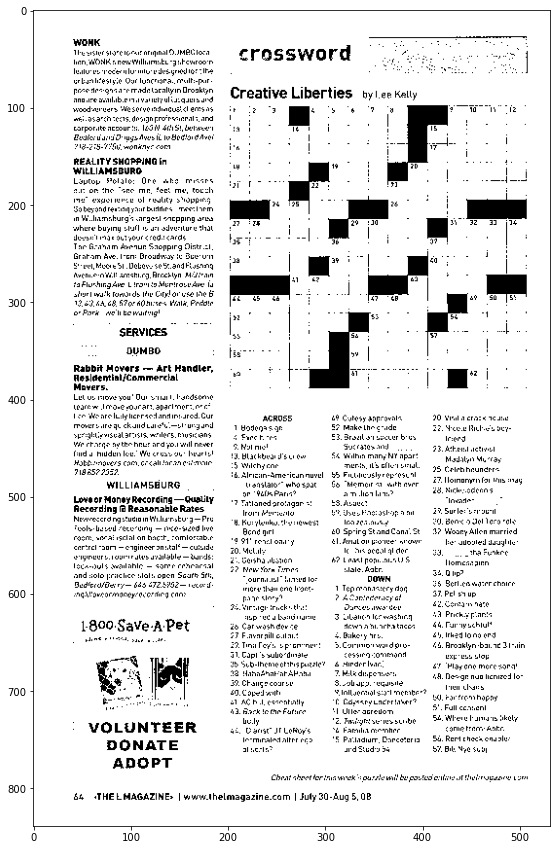

In [66]:
# so we differenttiate the color in the this image 
# where there is ink should be black and else where it should be white


ret1, thresh = cv2.threshold(img_r, 127, 255, cv2.THRESH_BINARY)
show_pic(thresh)

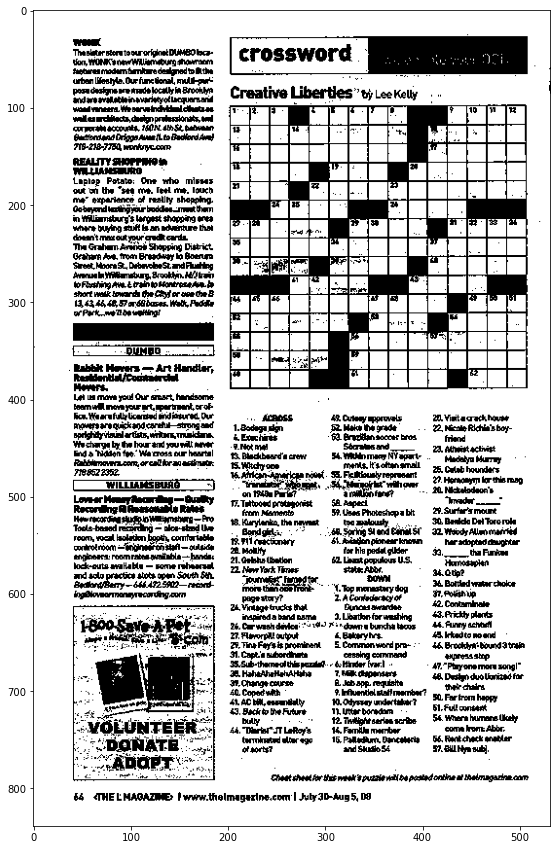

In [67]:
# there is a lot problems in above picture as there is a lot noise
# try to higher threshold


ret1, th1= cv2.threshold(img_r, 200, 255, cv2.THRESH_BINARY)
show_pic(th1)

In [71]:
help(cv2.adaptiveThreshold)

Help on built-in function adaptiveThreshold:

adaptiveThreshold(...)
    adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst
    .   @brief Applies an adaptive threshold to an array.
    .   
    .   The function transforms a grayscale image to a binary image according to the formulae:
    .   -   **THRESH_BINARY**
    .       \f[dst(x,y) =  \fork{\texttt{maxValue}}{if \(src(x,y) > T(x,y)\)}{0}{otherwise}\f]
    .   -   **THRESH_BINARY_INV**
    .       \f[dst(x,y) =  \fork{0}{if \(src(x,y) > T(x,y)\)}{\texttt{maxValue}}{otherwise}\f]
    .   where \f$T(x,y)\f$ is a threshold calculated individually for each pixel (see adaptiveMethod parameter).
    .   
    .   The function can process the image in-place.
    .   
    .   @param src Source 8-bit single-channel image.
    .   @param dst Destination image of the same size and the same type as src.
    .   @param maxValue Non-zero value assigned to the pixels for which the condition is satisfied
  

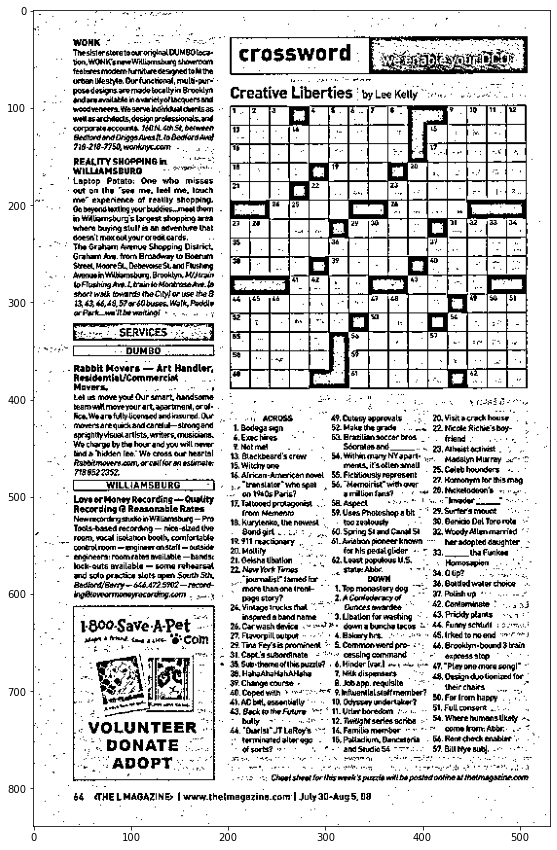

In [68]:
# that's a lot of threshold chosen but we can trail and run at different threshold
# or we can set threshold based off the pixel and where it is great around pixel


th2 = cv2.adaptiveThreshold(img_r,255, cv2.ADAPTIVE_THRESH_MEAN_C , cv2.THRESH_BINARY, 11, 8)
show_pic(th2)

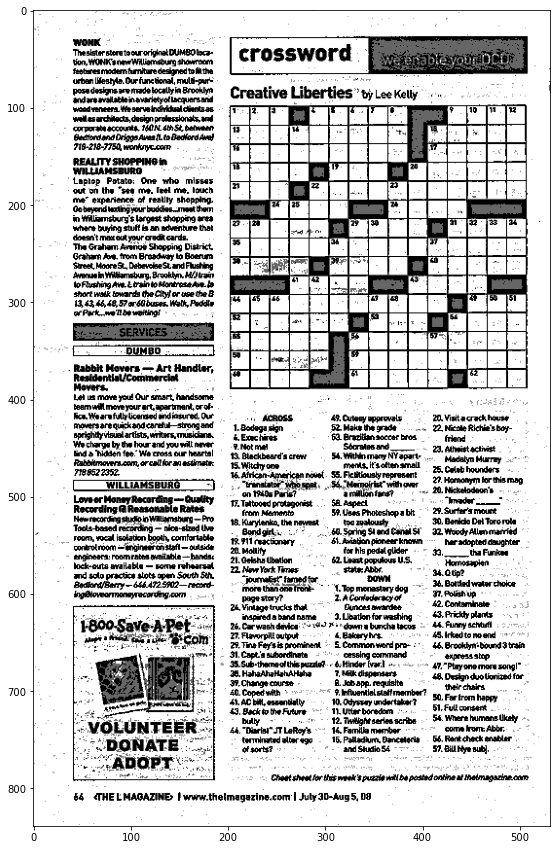

In [69]:
blanding = cv2.addWeighted(th1,0.6, th2, 0.4,0)
show_pic(blanding)

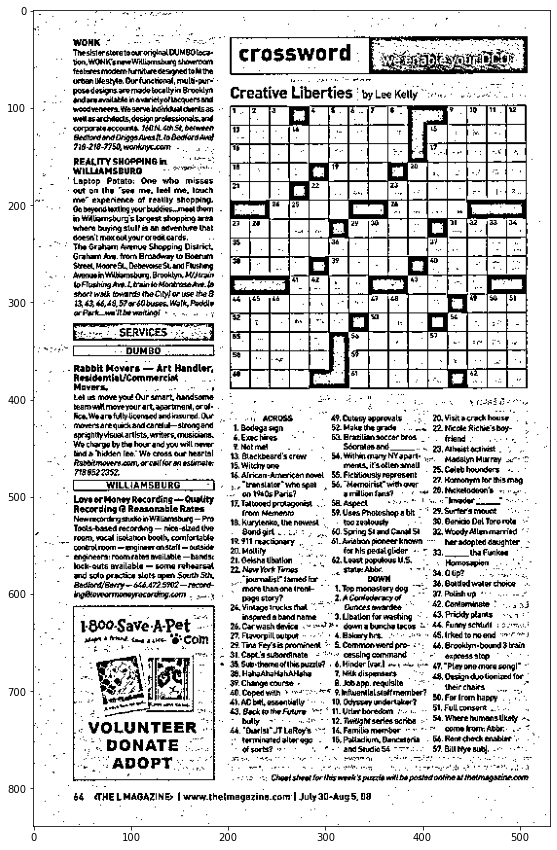

In [70]:
th3 = cv2.adaptiveThreshold(img_r, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11,8)

bland = cv2.addWeighted(th2, 0.6, th3, 0.4, 0)
show_pic(bland)